## Recursion formulae for $\mathcal{W}_v$

In this notebook we validate our recursion formulae for the integral $\mathcal{W}$.

In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [173]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.special import hyp2f1
import warnings

warnings.simplefilter("ignore")

Here is the definition of the $\mathcal{W}$ integral, which we compute numerically:

In [153]:
def Wexact(vmax, k2, kappa):
    """
    The vector W evaluated by direct numerical integration.
    
    """
    W = np.zeros(vmax + 1)
    for v in range(vmax + 1):
        for i in range(0, len(kappa), 2):
            func = (
                lambda x: np.cos(x) * np.sin(x) ** (2 * v + 1)
                * (1 + 0j - np.sin(x) ** 2 / k2) ** 1.5
            )
            W[v] += quad(
                func, 0.5 * kappa[i], 0.5 * kappa[i + 1], epsabs=1e-12, epsrel=1e-12,
            )[0]
    return W

And here is our analytic expression, computed via upward or downward recursion:

In [218]:
def Delta(x):
    """The sum over the pairwise differences of an array."""
    return sum(-np.array(x)[::2] + np.array(x)[1::2])


def W(vmax, k2, kappa, up=True):
    """
    The function W_v computed from a single boundary condition
    and a two-term upward/downward recurrence relation.
    
    """
    s2 = np.sin(0.5 * kappa) ** 2
    s4 = s2 * s2
    q = np.sqrt(1 - np.sin(0.5 * kappa) ** 2 / k2) 
    q2 = q ** 2
    q3 = q ** 3
    q5 = q ** 5
    
    W = np.zeros(vmax + 1)
    
    if up:
        
        # Boundary
        b = (s2 / 5) * ((1 - q3) / (1 - q2) + q3)
        c = s4 * q5 / (1.0 - q2)
        W[0] = Delta(b)

        # Recurse up
        for v in range(1, vmax + 1):
            b = (2.0 * v * s2 / (1 - q2) * b - c) / (2.0 * v + 5)
            c *= s2
            W[v] = Delta(b)
    
    else:
        
        # Boundary
        f = hyp2f1(-0.5, vmax + 1, vmax + 2, 1 - q2)
        b = s2 ** (vmax + 1) * (3.0 / (vmax + 1.0) * f + 2 * q3) / (4.0 * vmax + 10)
        c = 0.5 * q5 * s2 ** vmax
        W[vmax] = Delta(b)
        
        # Recurse down
        for v in range(vmax - 1, -1, -1):
            b = (1 - q2) / s2 * (1.0 + 5 / (2 * v + 2)) * b + c / (v + 1)
            c /= s2
            W[v] = Delta(b)

    return W

We can verify that the two expressions agree for all $v$, for a few different combinations of $\kappa$ and $k^2$:

In [220]:
def plot(vmax, k2, kappa):
    plt.plot(np.arange(vmax + 1), Wexact(vmax, k2, kappa), lw=6, label="exact")
    plt.plot(np.arange(vmax + 1), W(vmax, k2, kappa, up=True), lw=3, label="upward")
    plt.plot(np.arange(vmax + 1), W(vmax, k2, kappa, up=False), ls=":", lw=2, color="k", label="downward")
    plt.xlabel(r"$v$", fontsize=22)
    plt.ylabel(r"$w_v$", fontsize=22)
    plt.yscale("log")
    plt.legend();

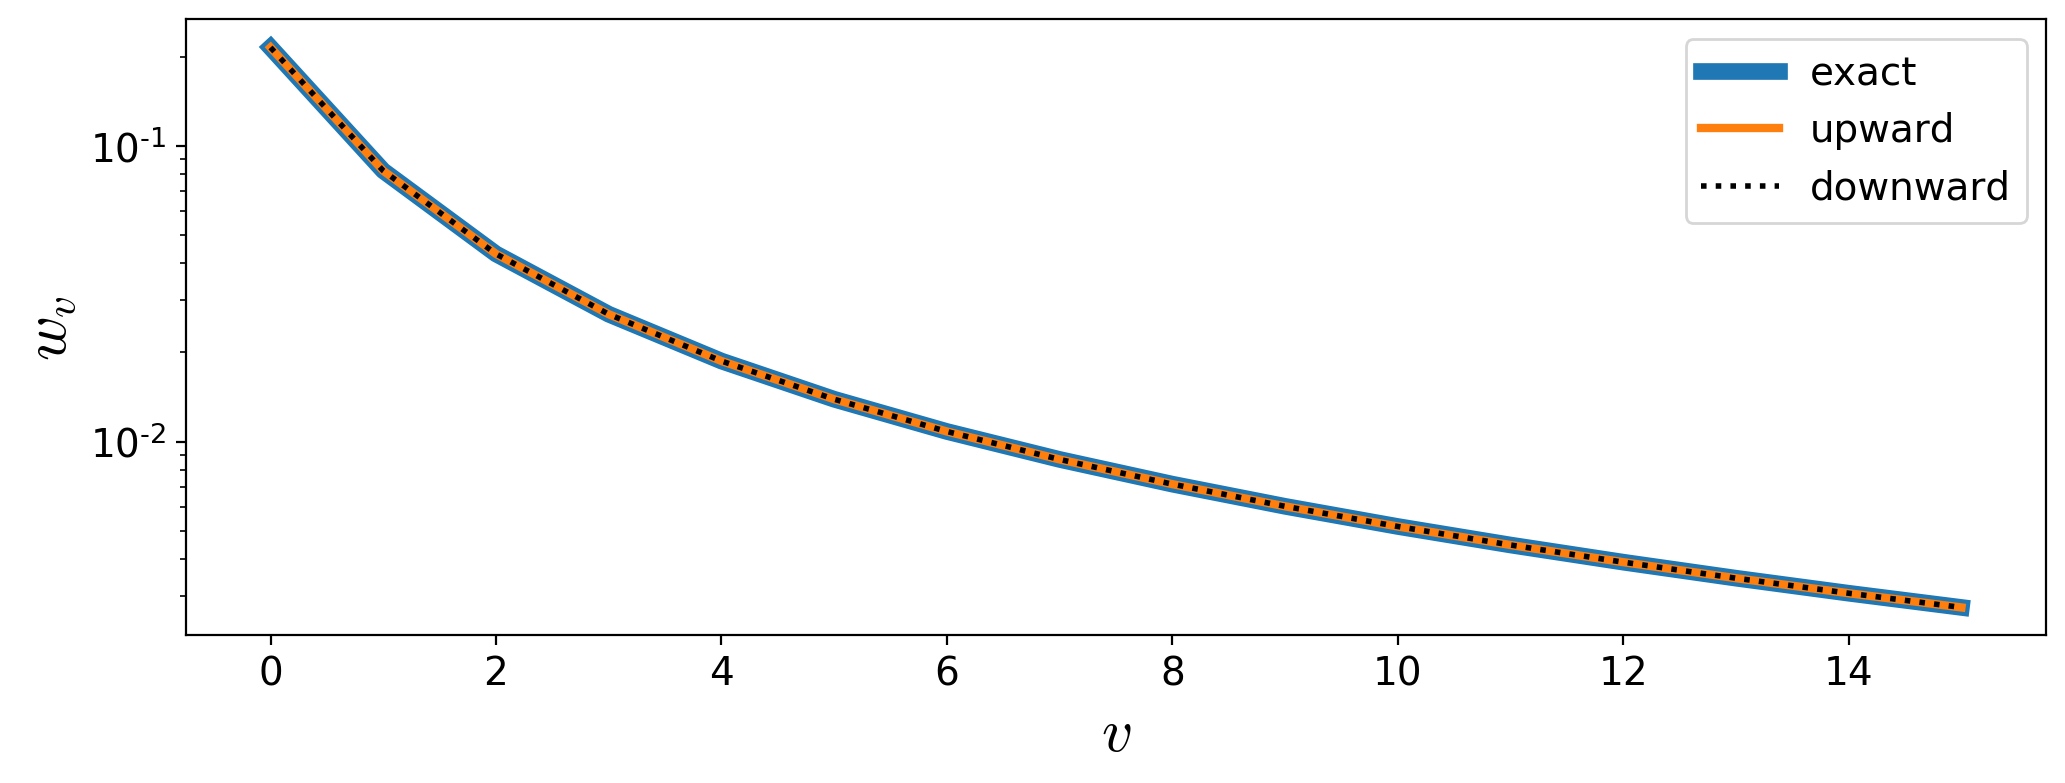

In [223]:
plot(15, 1.25, np.array([0.5, 2.8]))

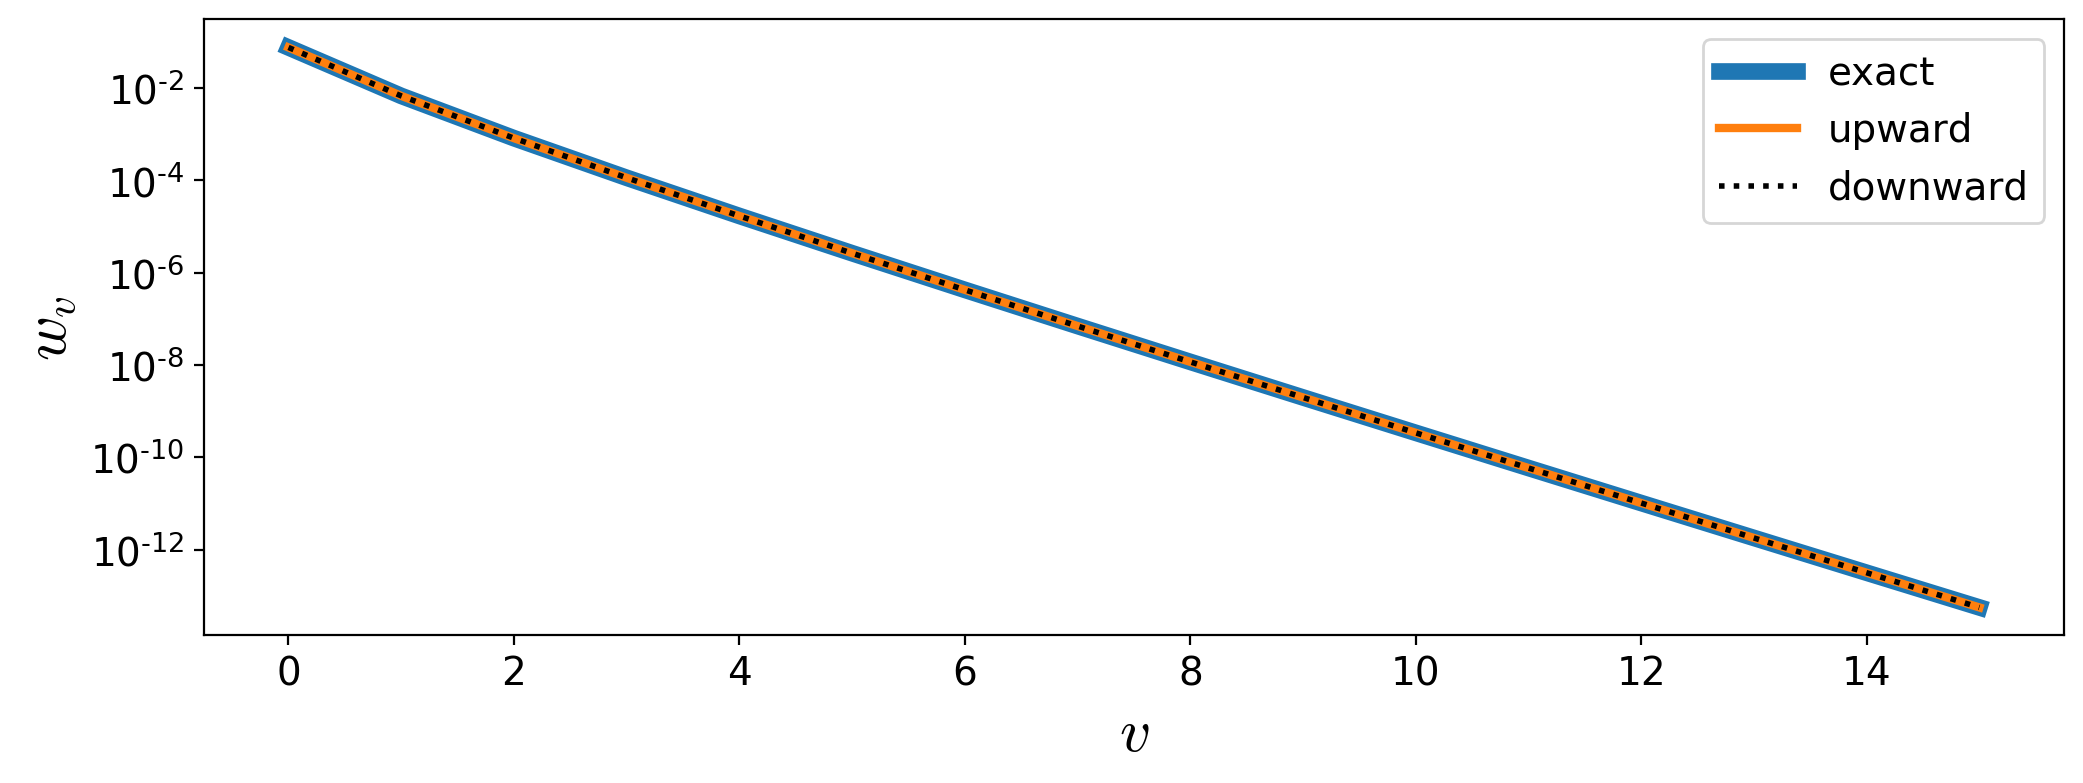

In [224]:
plot(15, 0.75, np.array([0.1, 0.9]))

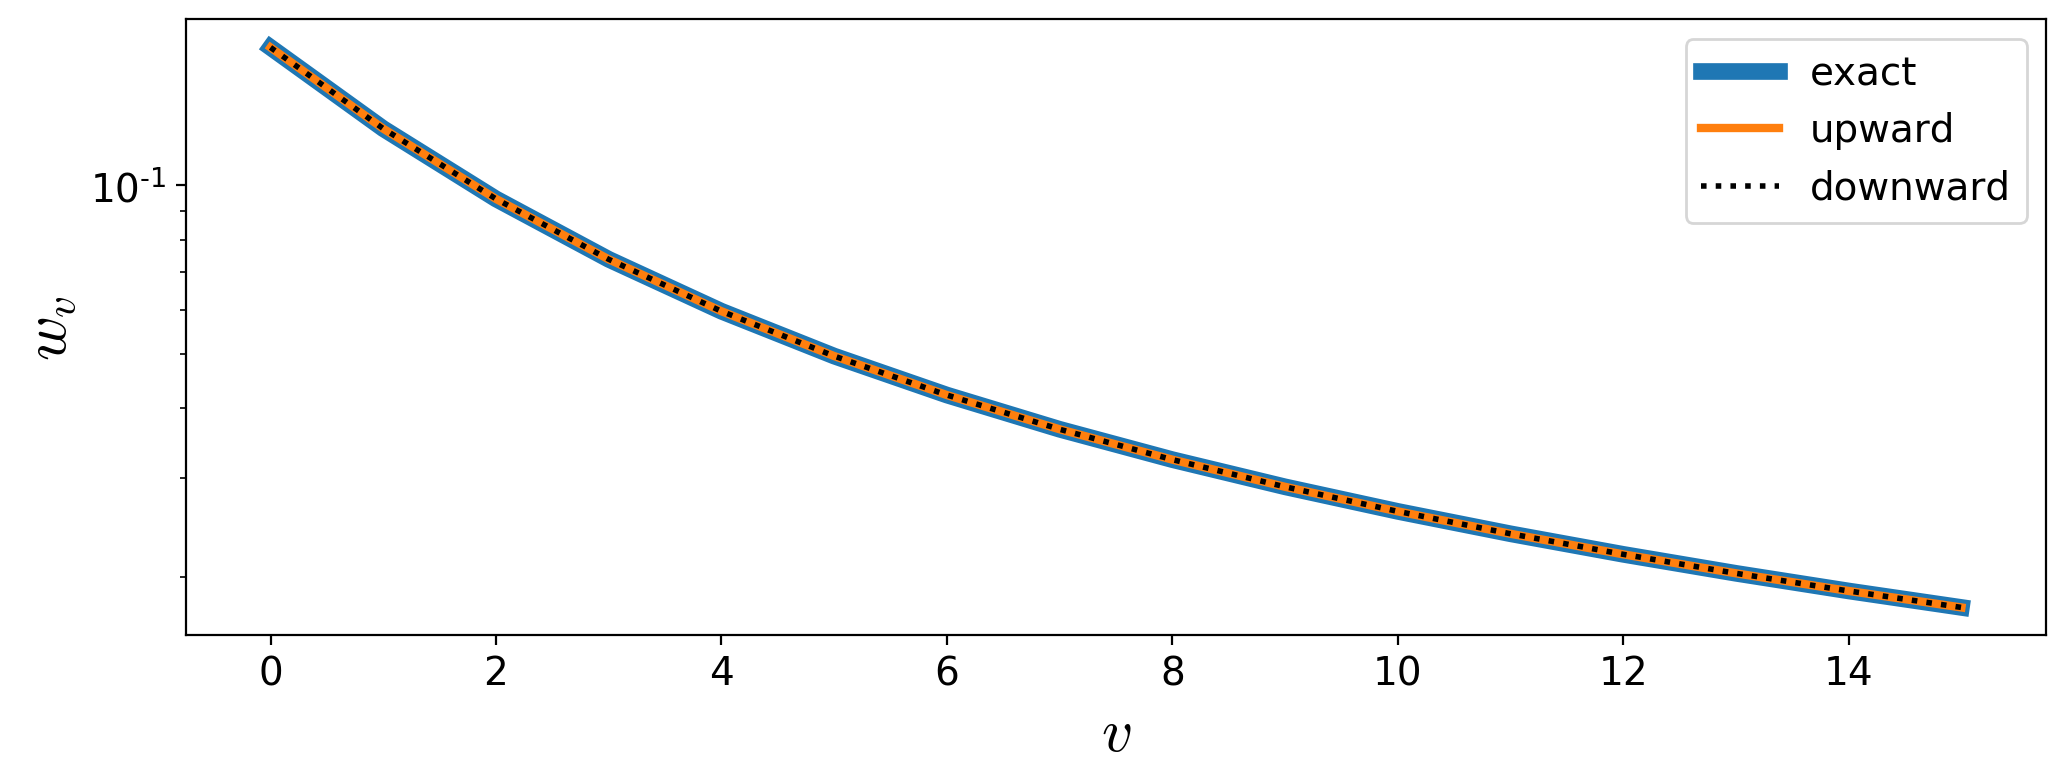

In [227]:
plot(15, 3.0, np.array([1.5, 3.1]))